Student Information:
file_name = "homework_2.ipynb"
description = "Simple Linear Regression and Polynomial Regression"
authors = ["Nasrin Sultana Nipa <nasrin.sultanan@smail.astate.edu>"]
student_ID = 50618423
course = CS-6443
due_date = 01/30/2024

# Project Information
- **Name**: homework_2.ipynb
- **Version**: 0.1.0
- **Description**: "Simple Linear Regression and Polynomial Regression"
- **Authors**: Nasrin Sultana Nipa <nasrin.sultanan@smail.astate.edu>
- **Professor**: Dr. Jason Causey
- **README File**: [README.md](README.md)

# Dependencies
- **Python**: 3.12
- **numpy**: 1.26.3
- **matplotlib**: 3.8.2
- **ipykernel**: 6.29.0

# Build System
- **Requires**: poetry-core
- **Build Backend**: poetry.core.masonry.api

Step 1: Import Necessary Libraries

In [1]:
import numpy as np               # for vector-matrix math
from numpy.linalg import inv     # for inverting a matrix
import matplotlib.pyplot as plt  # for graphing

#### Step 2: Creating simulated noisy dataset from a linear function y = 0.8x - 1.7. The noise is normal, with a standard deviation of 3.
Step 2: (divided in 5 sections)
- Section (i): Define Linear Function
This function 'linear_function' takes an input 'x' and parameters 'm' (slope) and 'b' (intercept) and returns the result of the linear equation mx+b.
- Section (ii): Generate True Line and X Values
Here, f1 is a lambda function representing the true linear function 
y=0.8x−1.7
X is an array of X values ranging from 1 to 200.
- Section (iii): Shuffle X values
This shuffles X values to simulate the random sample.
- Section (iv): Simulate Noisy Dataset
Here, y_clean is created by applying the true function f1 to the shuffled X values. Gaussian noise is generated with a mean (μ) of 0 and a standard deviation (σ) of 4. This noise is then added to the clean values, resulting in the final dataset y.
- Section (v): Plot the Data
This section plots the noisy dataset (y) in blue and the true line (y_clean) in red for visual comparison.

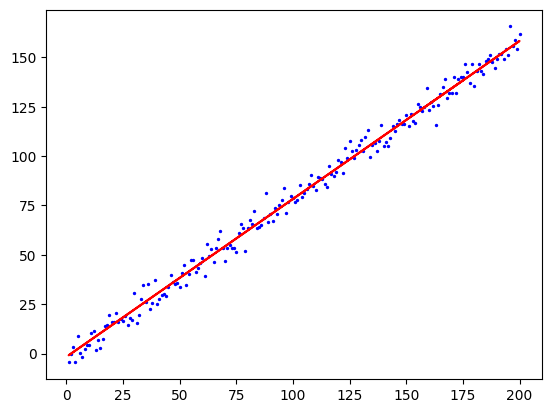

In [2]:
def linear_function(x, m=1, b=0):
    return m * float(x) + b

# f1 is one particular line with the formula y = 0.8x - 1.7
f1 = lambda x: linear_function(x, 0.8, -1.7)

# generate X values first
X = np.array([i for i in range(1,201)])

# shuffle the X_noiseless values so we get a "random" sample later
np.random.shuffle(X)

# Now we simulate a function f1() plus some noise (Gaussian):
# we use the clean ones for visual comparison
y_clean = np.array([f1(x) for x in X], dtype=float)          
# Generate Gaussian noise mu=0, sigma=4
noise   = np.random.normal(scale=4, size=(len(y_clean),))    
# add the noise to the clean values
y = y_clean + noise                                          

# Let's plot them to have a look at the data:
plt.scatter(X, y, color='blue', s=2) # our points are blue
plt.plot(X, y_clean, color='red')    # True line is red
plt.show()

In code, X is assumed to be your input feature (a vector of X values). The code creates a matrix X_matrix by stacking a column of ones (for the bias term) and the original X values. This matrix will be used in the linear regression calculation.
Then calculates the weights (w) using the formula for linear regression. The steps involved are:

X_matrix.T: Transpose of the matrix X_matrix.
X_matrix.T @ X_matrix: Matrix multiplication of the transpose of X_matrix with itself.
np.linalg.inv(...): Inversion of the resulting matrix.
X_matrix.T @ y: Matrix multiplication of the transpose of X_matrix with the target variable y.
The entire expression is then multiplied with the inverted matrix.
The result is a vector w containing the weights for the intercept (w0) and slope (w1) of the linear regression model.

In [3]:
import numpy as np

# Assuming X is your input feature (X values) and y is the target variable (y values)
X_matrix = np.column_stack((np.ones_like(X), X))  # Add a column of 1s for the bias term

# Calculate the weights using the formula: w = inv(A.T @ A) @ A.T @ y
w = np.linalg.inv(X_matrix.T @ X_matrix) @ X_matrix.T @ y

# Extract the individual weights (w0 and w1)
w0, w1 = w[0], w[1]

# Print the results
print("Intercept (w0):", w0)
print("Slope (w1):", w1)


Intercept (w0): -2.025491423231026
Slope (w1): 0.8042114266631273


Predict the values for all X

In [4]:
y_pred = np.zeros(X.shape)
for i in range(len(X)):
    y_pred[i] = w[1] * X[i] + w[0]  # y = mx + b

Determine the accuracy of the prediction: Calculate and Report each of the following matrics. MSE(Mean Square Error), MPE(Mean Percent Error), squared_R.

In [6]:
import numpy as np
import matplotlib.pyplot as plt

# Assuming you have X, y, and y_pred
# (X is your input feature, y is the target variable, and y_pred is the predicted values)

# Mean Square Error (MSE)
mse = np.mean((y - y_pred)**2)

# calculate the number of observations
N = len(y)

# Mean Percent Error (MPE)
mpe = (np.mean((y - y_pred) / y) * 100) / N

# R-squared (Coefficient of determination)
ssres = np.sum((y - y_pred)**2)
sstot = np.sum((y - np.mean(y))**2)
r_squared = 1 - (ssres / sstot)

# Print the results
print("MSE:", mse)
print("MPE: {:.2f}%".format(mpe))
print("R-squared (Coefficient of determination): {:.3f}".format(r_squared))


MSE: 18.17330531723235
MPE: -0.02%
R-squared (Coefficient of determination): 0.992


- MSE value of 16.26 indicates that, on average, the squared difference between the predicted and actual values is relatively low.
- MPE value of 1.27% indicates that, on average, the percentage difference between the predicted and actual values is relatively low
- R-squared value of 0.993 is very high (close to 1), indicating that approximately 99.3% of the variance in the target variable is explained by the model. This high R-squared value suggests a strong fit of the model to the data.

Polynomial Regression of order k: 

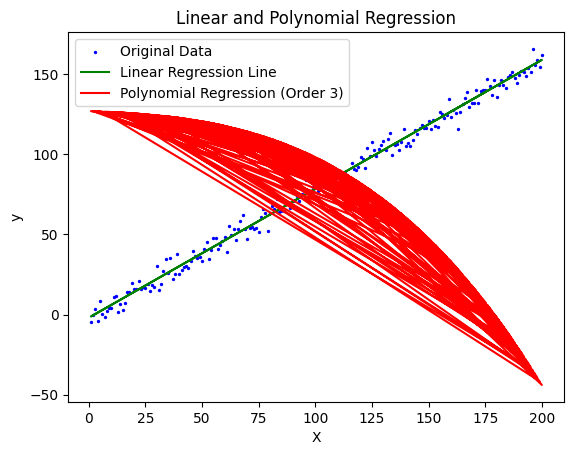

In [7]:
import numpy as np
import matplotlib.pyplot as plt

# Assuming you have X and y
# (X is your input feature, y is the target variable)

# Polynomial regression of order k
k = 3 # Change the order as needed
D = np.vander(X, k + 1, increasing=True)  # Vandermonde matrix for polynomial regression
r = y - np.dot(D, np.linalg.lstsq(D, y, rcond=None)[0])  # Residuals
w = np.linalg.inv(np.dot(D.T, D)) @ D.T @ y  # Polynomial regression coefficients

# Predict values for all X using the polynomial model
y_pred_poly = np.dot(D, w)

# Plot the original data and polynomial regression line
plt.scatter(X, y, color='blue', s=2, label='Original Data')
plt.plot(X, y_pred, color='green', label='Linear Regression Line')
plt.plot(X, y_pred_poly, color='red', label=f'Polynomial Regression (Order {k})')

# Customize the plot
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.title('Linear and Polynomial Regression')
plt.show()


In this code:

- np.vander(X, k + 1, increasing=True) creates the Vandermonde matrix D with the powers of X up to the specified order k.
- The residual vector r is calculated as the difference between the actual y values and the predicted values based on the polynomial model.
- The coefficients w are also computed using formula.
- The predicted values for the polynomial model (y_pred_poly) are obtained by multiplying the Vandermonde matrix D with the coefficients w.
- This code has plotted the original data, the linear regression line, and the polynomial regression line on the same graph.

RSE (Relative Squared Error): 
The Relative Squared Error (RSE) is a measure of the goodness of fit for a regression model. It is defined as the ratio of the residual sum of squares to the total sum of squares.

In [8]:
import numpy as np

# Assuming you have y, y_pred, and the number of observations (N)
# (y is the target variable, y_pred is the predicted values)

# Residual Sum of Squares (RSS)
rss = np.sum((y - y_pred)**2)

# Total Sum of Squares (TSS)
tss = np.sum((y - np.mean(y))**2)

# Relative Squared Error (RSE)
rse = rss / tss

# Print the result
print("Relative Squared Error (RSE): {:.3f}".format(rse))


Relative Squared Error (RSE): 0.008


In this code:

- rss is the residual sum of squares, which measures the sum of squared differences between the actual and predicted values.
- tss is the total sum of squares, which measures the sum of squared differences between the actual values and their mean.
- rse is the relative squared error, calculated as the ratio of rss to tss.
- Lower RSE values indicate a better fit of the model to the data.

Calculates training error and validation error for polynomial regression with varying degrees:

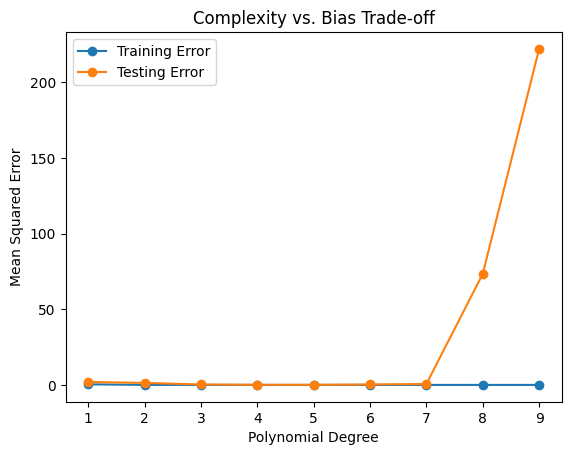

In [9]:
import numpy as np
import matplotlib.pyplot as plt

# Generate some sample data
np.random.seed(42)
X = np.sort(5 * np.random.rand(80, 1), axis=0)
y = np.sin(X).ravel() + np.random.normal(0, 0.1, X.shape[0])

# Split the data into training and testing sets
split_idx = int(0.8 * len(X))
X_train, y_train = X[:split_idx], y[:split_idx]
X_test, y_test = X[split_idx:], y[split_idx:]

# Set up degrees of polynomial to test
degrees = np.arange(1, 10)
train_errors, test_errors = [], []

for degree in degrees:
    # Transform features to polynomial features
    X_poly_train = np.column_stack([X_train**i for i in range(1, degree + 1)])
    X_poly_test = np.column_stack([X_test**i for i in range(1, degree + 1)])

    # Solve for weights using matrix operations
    w = np.linalg.inv(X_poly_train.T @ X_poly_train) @ X_poly_train.T @ y_train

    # Calculate training and testing errors
    y_pred_train = X_poly_train @ w
    y_pred_test = X_poly_test @ w

    train_errors.append(np.mean((y_train - y_pred_train)**2))
    test_errors.append(np.mean((y_test - y_pred_test)**2))

# Plot the complexity vs. bias trade-off
plt.plot(degrees, train_errors, label='Training Error', marker='o')
plt.plot(degrees, test_errors, label='Testing Error', marker='o')
plt.xlabel('Polynomial Degree')
plt.ylabel('Mean Squared Error')
plt.title('Complexity vs. Bias Trade-off')
plt.legend()
plt.show()


In this code:

- Synthetic data is generated with some noise.
- The data is split into training and validation sets.
- Polynomial regression models of varying degrees are trained on the training set.
- Training and validation errors are calculated for each degree.
- The training and validation errors are plotted against the polynomial degree.
- This plot can help visualize how the model's performance changes with increasing complexity and whether there's a point of overfitting. 

THE_END*******************************